# SMOTE-IPF implementation for multi-class datasets
The following code can be used to oversample multi-class datasets using SMOTE-IPF. It also shows various details of the dataset created like the number of new samples in each class and shows a diagram showing the changes from the original dataset side by side.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd
import sklearn.datasets as datasets

Loading the classic multi-class dataset named wine, which is available in sklearn datasets.

In [2]:
dataset= datasets.load_wine()
X, y= dataset['data'], dataset['target']

## Illustrating the imbalance in the current dataset using a scatter plot

Finding the Majority class and the distribution of the dataset

In [3]:
for i in np.unique(y):
    print("Class %d - Samples: %d" % (i, np.sum(y == i)))

Class 0 - Samples: 59
Class 1 - Samples: 71
Class 2 - Samples: 48


Plotting the dataset with three-classes. Class 0, Class 1, and Class 2. Here, we plot only the first two co-ordinates in a scatter plot.

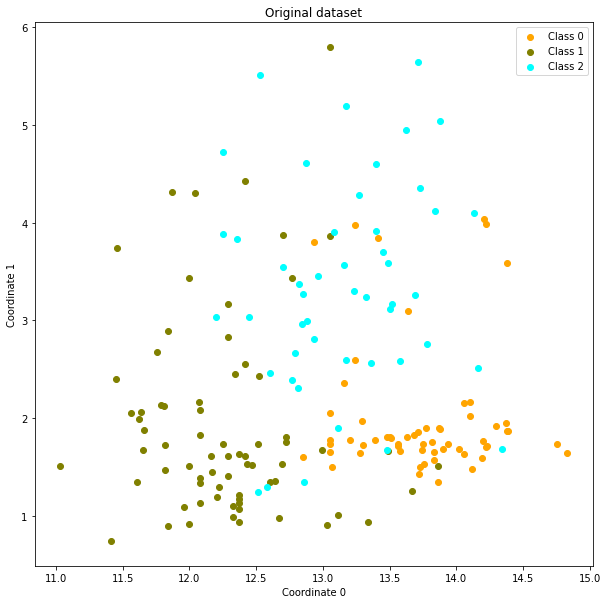

In [10]:
colors= ['orange', 'olive', 'cyan']

plt.figure(figsize=(10, 10))
for i in np.unique(y):
    plt.scatter(X[y == i][:,0], X[y == i][:,1], label='Class %d' % i, c= colors[i])
plt.title('Original dataset')
plt.xlabel('Coordinate 0')
plt.ylabel('Coordinate 1')
plt.legend()

## Oversampling using SMOTE_IPF

We use the class `smote_variants.MulticlassOversampling` for multiclass oversampling using SMOTE-IPF.

We use default paramaters with proportion `1.0`. This ensures that the oversampled dataset has equal number of samples. All the default parameters are 
```
{
    'proportion': 1.0, 
    'n_neighbors': 5, # number of neighbors in SMOTE sampling
    'n_folds': 9, # the number of partitions
    'k': 3, # used in stopping condition
    'p': 0.01, #  percentage value ([0,1]) used in stopping condition
    'voting': 'majority', # 'majority'/'consensus'
    'n_jobs': 1, # number of parallel jobs
    'classifier': DecisionTreeClassifier(random_state=2), # classifier object
    'random_state': None # initializer of random_state
}
```

In [5]:
oversampler= sv.MulticlassOversampling(sv.SMOTE_IPF())
X_samp, y_samp= oversampler.sample(X, y)

2021-11-20 23:19:19,054:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2021-11-20 23:19:19,055:INFO:MulticlassOversampling: Sampling minority class with label: 0
2021-11-20 23:19:19,057:INFO:SMOTE_IPF: Running sampling via ('SMOTE_IPF', "{'proportion': 1.0, 'n_neighbors': 5, 'n_folds': 9, 'k': 3, 'p': 0.01, 'voting': 'majority', 'n_jobs': 1, 'classifier': DecisionTreeClassifier(random_state=2), 'random_state': None}")
2021-11-20 23:19:19,058:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/home/nmc/.local/lib/python3.9/site-packages/numpy/random/__init__.py'>}")
2021-11-20 23:19:19,067:INFO:SMOTE_IPF: Removing 0 elements
2021-11-20 23:19:19,074:INFO:SMOTE_IPF: Removing 0 elements
2021-11-20 23:19:19,081:INFO:SMOTE_IPF: Removing 0 elements
2021-11-20 23:19:19,083:INFO:MulticlassOversampling: Sampling minority class with label: 2
2021-11-20 23:19

`X_samp` contains oversampled `X` data and `y_samp` contains oversampled `y` data. Now let's look at the number of samples in each class.

In [6]:
print('Class 0: %d' % np.sum(y_samp == 0))
print('Class 1: %d' % np.sum(y_samp == 1))
print('Class 2: %d' % np.sum(y_samp == 2))

Class 0: 71
Class 1: 71
Class 2: 71


Each class has equal number of datapoints as we have described above. Now we filters newly sampled datapoints to plot them distinctly below.

In [7]:
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

Printing the number of new samples

In [8]:
for i in np.unique(y_samp):
    print("Class %d - Samples: %d" % (i, np.sum(y_samp == i)))

Class 0 - Samples: 12
Class 2 - Samples: 23


Now using a scatter plot, we plot Original dataset vs Oversampled dataset, showing the new samples distinctly.

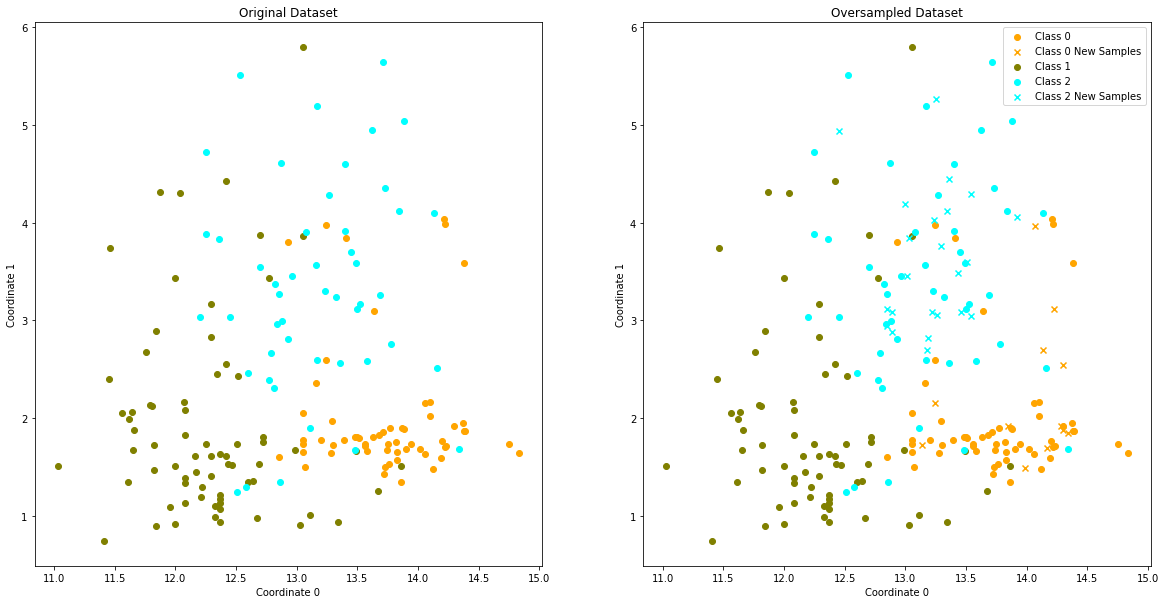

In [11]:
plt.figure(figsize=(20, 10))
ax= plt.subplot(121) # Plotting original
for i in np.unique(y):
    plt.scatter(X[y == i][:,0], 
                X[y == i][:,1], 
                label='Class %d' % i, 
                c=colors[i],
                marker='o')
plt.title('Original Dataset')
plt.xlabel('Coordinate 0')
plt.ylabel('Coordinate 1')

ax= plt.subplot(122)
for i in np.unique(y):
    plt.scatter(X[y == i][:,0], 
                X[y == i][:,1], 
                label='Class %d' % i, 
                c=colors[i],
                marker='o')

    if len(y_samp[y_samp == i]):
        plt.scatter(X_samp[y_samp == i][:, 0], 
                    X_samp[y_samp == i][:, 1], 
                    label='Class %d New Samples' % i, 
                    c=colors[i], 
                    marker='x')
plt.title('Oversampled Dataset')
plt.xlabel('Coordinate 0')
plt.ylabel('Coordinate 1')
plt.legend()